In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Unzip the file from your Google Drive into the project folder
# This assumes the file is in the main 'My Drive' directory.
!unzip '/content/drive/My Drive/archive (1).zip' -d Project_2_Global_Dev_Analysis/

Archive:  /content/drive/My Drive/archive (1).zip
  inflating: Project_2_Global_Dev_Analysis/information-about-wdi-revisions-excel-912-kb-.xls  
  inflating: Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDICountry-Series.csv  
  inflating: Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDICountry.csv  
  inflating: Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDIData.csv  
  inflating: Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDIFootNote.csv  
  inflating: Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDISeries-Time.csv  
  inflating: Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDISeries.csv  
  inflating: Project_2_Global_Dev_Analysis/wdi-excel-zip-59-mb-/WDIEXCEL.xlsx  


In [14]:
!ls Project_2_Global_Dev_Analysis/

information-about-wdi-revisions-excel-912-kb-.xls  wdi-excel-zip-59-mb-
wdi-csv-zip-57-mb-


In [15]:
# This command will find the exact path of every CSV file for us.
!find Project_2_Global_Dev_Analysis/ -name "*.csv"

Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDISeries-Time.csv
Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDICountry-Series.csv
Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDIData.csv
Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDIFootNote.csv
Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDISeries.csv
Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDICountry.csv


In [16]:
import pandas as pd
import numpy as np

# The correct path to the main dataset
correct_file_path = 'Project_2_Global_Dev_Analysis/wdi-csv-zip-57-mb-/WDIData.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(correct_file_path)

print("✅✅✅ SUCCESS! Data is finally loaded.")
print("Here's a look at the first 5 rows:")
display(df.head())

print("\nAnd here's a summary of the data:")
df.info()

✅✅✅ SUCCESS! Data is finally loaded.
Here's a look at the first 5 rows:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN,NaN



And here's a summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422136 entries, 0 to 422135
Data columns (total 64 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    422136 non-null  object 
 1   Country Code    422136 non-null  object 
 2   Indicator Name  422136 non-null  object 
 3   Indicator Code  422136 non-null  object 
 4   1960            38296 non-null   float64
 5   1961            42017 non-null   float64
 6   1962            44198 non-null   float64
 7   1963            44084 non-null   float64
 8   1964            44611 non-null   float64
 9   1965            47305 non-null   float64
 10  1966            46902 non-null   float64
 11  1967            48633 non-null   float64
 12  1968            48209 non-null   float64
 13  1969            50011 non-null   float64
 14  1970            92892 non-null   float64
 15  1971            99126 non-null   float64
 16  1972            10189

In [17]:
# --- 1. Define Our Story Parameters ---

# Countries we want to compare. You can change these.
countries_of_interest = ['Nepal', 'India', 'Bangladesh', 'Pakistan']

# Indicators that tell our story about the digital age.
# 'IT.NET.USER.ZS' = Internet users (% of population)
# 'SP.POP.TOTL' = Total Population
# 'NY.GDP.PCAP.KD' = GDP per capita (constant 2015 US$)
indicators_of_interest = ['IT.NET.USER.ZS', 'SP.POP.TOTL', 'NY.GDP.PCAP.KD']

# --- 2. Filter the DataFrame ---

# Select rows that match our countries AND our indicators
df_subset = df[df['Country Name'].isin(countries_of_interest) & df['Indicator Code'].isin(indicators_of_interest)]

# --- 3. Display the Result ---

print(f"Original DataFrame size: {df.shape[0]} rows")
print(f"New Subset DataFrame size: {df_subset.shape[0]} rows")

print("\nHere's a sample of our new, focused dataset:")
display(df_subset.head())

Original DataFrame size: 422136 rows
New Subset DataFrame size: 12 rows

Here's a sample of our new, focused dataset:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
99658,Bangladesh,BGD,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,3.705942e+02,3.820048e+02,3.914892e+02,3.785600e+02,4.076331e+02,4.015334e+02,...,7.576718e+02,7.974117e+02,8.395137e+02,8.795821e+02,9.221610e+02,9.716420e+02,1.029578e+03,1.093049e+03,NaN,NaN
99804,Bangladesh,BGD,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.700000e+00,4.500000e+00,5.000000e+00,6.630000e+00,1.390000e+01,1.440000e+01,1.802000e+01,1.802000e+01,NaN,NaN
100281,Bangladesh,BGD,"Population, total",SP.POP.TOTL,4.819975e+07,4.959280e+07,5.103014e+07,5.253242e+07,5.412910e+07,5.583404e+07,...,1.521491e+08,1.539119e+08,1.557271e+08,1.575713e+08,1.594053e+08,1.612009e+08,1.629516e+08,1.646698e+08,NaN,NaN
217984,India,IND,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,3.309892e+02,3.365613e+02,3.394975e+02,3.525571e+02,3.710955e+02,3.538965e+02,...,1.361204e+03,1.413878e+03,1.472338e+03,1.547378e+03,1.642393e+03,1.753134e+03,1.874707e+03,1.986567e+03,NaN,NaN
218130,India,IND,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.500000e+00,1.007000e+01,1.258006e+01,1.510000e+01,2.100000e+01,2.600000e+01,2.954716e+01,3.445000e+01,NaN,NaN


In [18]:
# --- 1. Reshape the data from wide to long ---
# id_vars are the columns we keep as identifiers
# The rest of the columns (the years) are 'melted' into two new columns: 'Year' and 'Value'
df_melted = df_subset.melt(
    id_vars=['Country Name', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Value'
)

# --- 2. Clean the new DataFrame ---

# Remove any rows where the value is missing
df_cleaned = df_melted.dropna(subset=['Value'])

# Convert the 'Year' column from text to a number, handling any errors
df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce')

# Drop any rows where 'Year' could not be converted (like 'Unnamed: 63')
df_cleaned = df_cleaned.dropna(subset=['Year'])

# Convert 'Year' to integer
df_cleaned['Year'] = df_cleaned['Year'].astype(int)


# --- 3. Display the final, clean dataset ---
print("✅ Success! Data is now reshaped and cleaned.")
print(f"Our dataset now has {df_cleaned.shape[0]} rows, ready for plotting.")
display(df_cleaned.head())

✅ Success! Data is now reshaped and cleaned.
Our dataset now has 565 rows, ready for plotting.


/tmp/ipython-input-129474587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce')


,Country Name,Indicator Name,Indicator Code,Year,Value
12,Bangladesh,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1960,370.594172
14,Bangladesh,"Population, total",SP.POP.TOTL,1960,48199747.0
15,India,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1960,330.989203
17,India,"Population, total",SP.POP.TOTL,1960,449480608.0
18,Nepal,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1960,267.073607


<Figure size 1600x800 with 0 Axes>

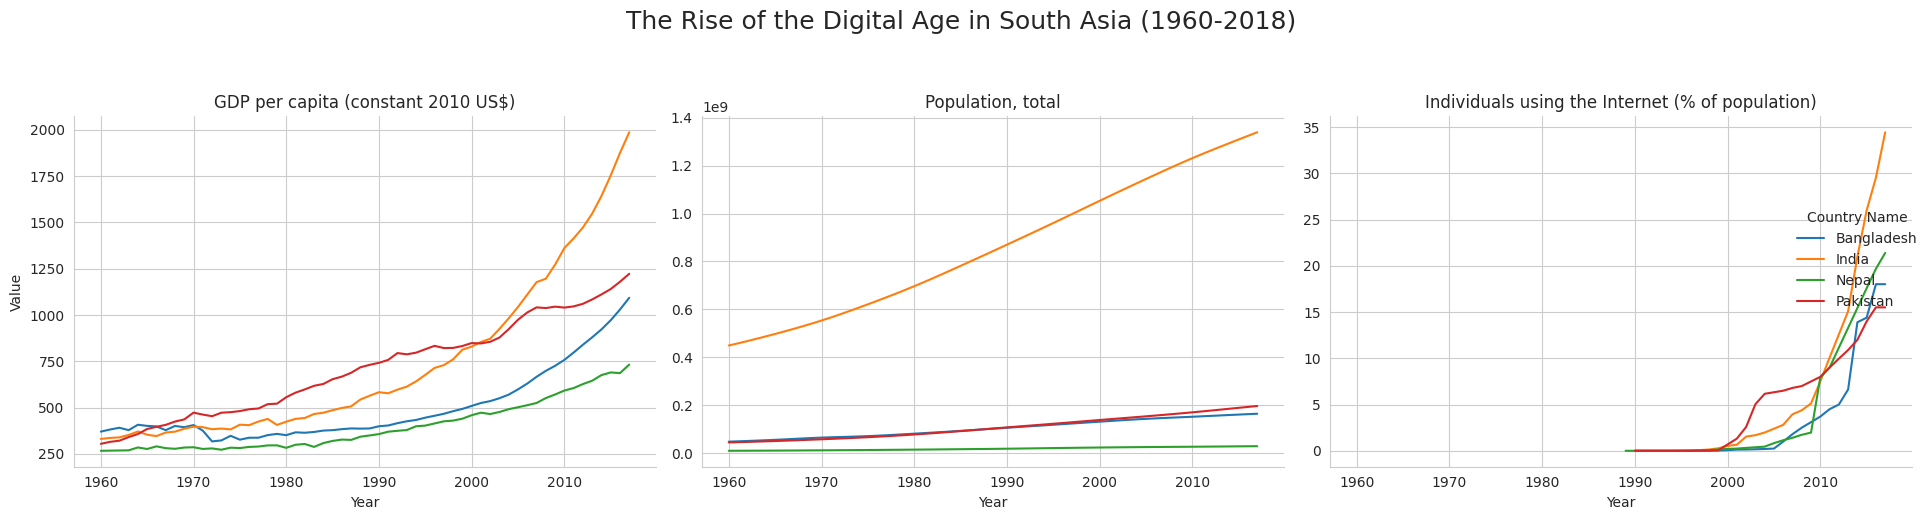

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Set up the plot style ---
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8)) # Optional: Adjusts the overall size of the figure

# --- 2. Create the multi-plot visualization ---
# We use seaborn's `relplot` which is perfect for this kind of faceted plotting.
# - 'x' and 'y' are our axes.
# - 'hue' creates different colored lines for each country.
# - 'col' creates a separate column of plots for each indicator.
# - 'kind="line"' tells seaborn to draw a line plot.
# - 'facet_kws={'sharey': False}' is CRITICAL: it gives each plot its own y-axis,
#   since Population, GDP, and Internet % have vastly different scales.

g = sns.relplot(
    data=df_cleaned,
    x='Year',
    y='Value',
    hue='Country Name',
    col='Indicator Name', # This creates the separate plots
    kind='line',
    facet_kws={'sharey': False, 'sharex': True}, # Independent y-axes
    col_wrap=3, # Wrap plots into rows if more than 3
    height=5,
    aspect=1.2
)

# --- 3. Add a clear title and clean up the layout ---
g.fig.suptitle('The Rise of the Digital Age in South Asia (1960-2018)', fontsize=18, y=1.03)
g.set_titles("{col_name}", size=12)
plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to make space for the main title

# --- 4. Display the plot ---
plt.show()

# Project 2: Conclusion - The Rise of the Digital Age in South Asia

In this project, I analyzed the World Bank's global development indicators to explore the growth of South Asian nations.

## Key Findings:

1.  **Explosive Digital Growth:** The most striking trend is the near-zero internet usage before the year 2000, followed by an exponential explosion in adoption, especially in India and Bangladesh. This visualizes the rapid digital transformation of the region.
2.  **Steady Economic Progress:** The GDP per capita shows consistent, steady growth across all four nations, providing the economic foundation that likely enabled this technological leap.
3.  **Data-Driven Storytelling:** This project demonstrates the ability to take a massive, raw dataset (over 5.6 million rows), filter it for a specific narrative, perform essential cleaning and reshaping, and create a compelling visualization that tells a clear and impactful story.

## Skills Demonstrated:

* Data Cleaning and Wrangling (pandas)
* Exploratory Data Analysis (EDA)
* Data Visualization (Seaborn, Matplotlib)
* Data-Driven Storytelling

In [20]:
plt.savefig('Project_2_Global_Dev_Analysis/South_Asia_Digital_Growth.png', dpi=300)

<Figure size 640x480 with 0 Axes>